In [1]:
import numpy as np
import pandas as pd

tracks_genres = pd.read_csv('tracks_genres_mio2.csv', index_col = 0, header = [0])

In [2]:
import librosa
import sklearn
import librosa.display
from scipy import stats
import os.path

audio_dir = 'C:/Users/bonno/ProgettoBigData/fma_large'
dizionario = {}

#Imposto parametri per il calcolo dei mffcs
sr = 22050
n_mfcc = 12
#n_fft = 1024
#hop_length = 256

#Voglio estrarre feature da ogni traccia
for track_id in tracks_genres.index:
    try:
        #Nome del file audio da caricare
        tid_str = '{:06d}'.format(track_id)
        filename = os.path.join(audio_dir, tid_str[:3], tid_str + '.mp3')
        
        x , sr = librosa.load(filename, sr=sr)

        #mfccs = librosa.feature.mfcc(x, sr=sr, n_mfcc=n_mfcc, hop_length=hop_length, n_fft=n_fft)
        mfccs = librosa.feature.mfcc(x, n_mfcc=n_mfcc, sr=sr)

        #Faccio le elaborazioni per ognuno delle n_mfcc bande di frequenza
        media_array, deviaz_array, max_array, min_array, mediana_array, skew_array, kurtosis_array = [], [], [], [], [], [], []

        for frequency_band in mfccs:
            media_array.append(np.mean(frequency_band))
            deviaz_array.append(np.std(frequency_band))
            max_array.append(np.amax(frequency_band))
            min_array.append(np.amin(frequency_band))
            mediana_array.append(np.median(frequency_band))
            skew_array.append(stats.skew(frequency_band))
            kurtosis_array.append(stats.kurtosis(frequency_band))

        concatened_array = np.concatenate((media_array, deviaz_array, max_array, min_array, mediana_array, skew_array, kurtosis_array))
        dizionario[track_id] = concatened_array
    except:
        print('Oh no! Traccia numero' , track_id, ' non funziona')

c:\users\bonno\anaconda3\envs\projectenv\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
c:\users\bonno\anaconda3\envs\projectenv\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Oh no! Traccia numero 1486  non funziona
Oh no! Traccia numero 5574  non funziona
Oh no! Traccia numero 12838  non funziona
Oh no! Traccia numero 29345  non funziona
Oh no! Traccia numero 29346  non funziona
Oh no! Traccia numero 29352  non funziona
Oh no! Traccia numero 29356  non funziona
Oh no! Traccia numero 33411  non funziona
Oh no! Traccia numero 33413  non funziona
Oh no! Traccia numero 33414  non funziona
Oh no! Traccia numero 33417  non funziona
Oh no! Traccia numero 33418  non funziona
Oh no! Traccia numero 33419  non funziona
Oh no! Traccia numero 33425  non funziona
Oh no! Traccia numero 50594  non funziona
Oh no! Traccia numero 54569  non funziona
Oh no! Traccia numero 54582  non funziona
Oh no! Traccia numero 65753  non funziona
Oh no! Traccia numero 80391  non funziona
Oh no! Traccia numero 94234  non funziona
Oh no! Traccia numero 98558  non funziona
Oh no! Traccia numero 98559  non funziona
Oh no! Traccia numero 98560  non funziona
Oh no! Traccia numero 98562  non fun

In [3]:
import IPython.display as ipd
from sklearn.preprocessing import StandardScaler

#Dichiaro i nomi delle colonne del DataFrame che voglio creare dal dizionario
root_indexes = np.array(['mfcc']*7*(n_mfcc+1))
lower_indexes = np.arange(1,n_mfcc+1)
lower_indexes = np.tile(lower_indexes, 7)
upper_indexes = np.array([['mean'],['std'],['max'],['min'],['median'],['skew'],['kurtosis']])
upper_indexes = np.repeat(upper_indexes, n_mfcc)

indexes_array = [root_indexes,upper_indexes,lower_indexes]
tuples = list(zip(*indexes_array))
index = pd.MultiIndex.from_tuples(tuples)

#Creo un DataFrame dal dizionario
mfccs_df = pd.DataFrame(data=dizionario.values(), index = dizionario.keys(), columns=index)
mfccs_df.index.name = 'track_id'

#Creo un altro DataFrame che ha i dati scalati con lo StandardScaler
scaler = StandardScaler()
scaled_mfcc = scaler.fit_transform(mfccs_df)

scaled_mfcc_df = pd.DataFrame(data=scaled_mfcc, index = dizionario.keys(), columns = index)
scaled_mfcc_df.index.name = 'track_id'

ipd.display(scaled_mfcc_df)

#Creo due file csv, uno con i dati scalati e uno con i dati "grezzi"
mfccs_df.to_csv('mfcc_not_scaled.csv')
scaled_mfcc_df.to_csv('mfcc.csv')

mfcc                                                    \
              mean                                                     
                1         2         3         4         5         6    
track_id                                                               
2        -1.171439 -0.248598 -1.019045 -0.496287  0.103340 -0.045226   
3        -0.960181  0.010757  0.160338  0.209890  0.354125 -0.328478   
5        -0.568231  0.635512 -0.230519 -0.301917  0.383168 -0.465180   
10       -0.371498 -1.718318  0.311953 -0.600178 -0.635522 -0.079029   
134      -0.647093  0.076090  0.448483  0.188969 -0.046518  0.665180   
...            ...       ...       ...       ...       ...       ...   
155304   -0.575552  0.681066  0.999145  0.124047  0.444907  1.363107   
155305    0.691886  1.359166  0.403695  0.937591 -1.160162  0.242235   
155306    1.480693  0.108587  0.341314  0.852379 -0.541922  0.745507   
155307   -0.561569  0.432140 -0.534512  0.401204  0.479399  0.935140   
155314    0.054606 -0.597720  0.538590 -0.234282 -0.747018 -0.069779   

                                                  ...                      \
                                                  ...  kurtosis             
                7         8         9         10  ...        3         4    
track_id                                          ...                       
2         0.072373 -0.351597 -0.289402 -1.015783  ... -0.165520 -0.222160   
3         0.265190 -0.635641  0.592344 -0.485969  ... -0.401657 -0.408109   
5         1.484604 -0.363195 -0.456816  0.310628  ... -0.329747 -0.419109   
10       -0.250375 -0.231001 -0.372466 -0.846398  ... -0.614444 -0.861374   
134       1.772248  0.617269  1.103632  0.983919  ...  0.113735 -0.553678   
...            ...       ...       ...       ...  ...       ...       ...   
155304    0.037376 -0.242993  0.264967 -0.360684  ... -0.259935 -0.397055   
155305   -0.982086 -1.633952  0.475092 -0.807019  ... -0.353116  1.166649   
155306   -0.967252  0.416183 -0.270824 -1.106438  ... -0.580868 -0.653391   
155307    0.696046 -0.076938  0.439262  0.546799  ... -0.409342  0.058530   
155314    1.094471 -0.503409  0.334640 -0.342786  ... -0.432014 -0.654968   

                                                                      \
                                                                       
                5         6         7         8         9         10   
track_id                                                               
2        -0.121354  0.012763 -0.397281 -0.338948  0.451127 -0.344055   
3         0.377446  0.507494 -0.161980 -0.214528  0.533760 -0.023986   
5        -0.478834 -0.124476 -0.443159  0.172496 -0.342047  0.214042   
10       -0.168640 -0.584961 -0.075992 -0.820824 -0.191281 -0.069479   
134      -0.246692  0.148163  0.080415  0.066864  0.532036 -0.299235   
...            ...       ...       ...       ...       ...       ...   
155304   -0.302591 -0.340456 -0.650064  0.017105  0.383275 -0.089229   
155305   -0.674964 -0.063851 -0.366673  0.267633  1.961654  0.019958   
155306   -0.363019  0.516835  1.511228 -0.541013  0.184403  0.217962   
155307   -0.717478 -0.467053 -0.596349 -0.444641 -0.101747 -0.110124   
155314    0.249672 -0.371096  0.171702 -0.271511 -0.452027 -0.424913   

                              
                              
                11        12  
track_id                      
2        -0.037615  0.143547  
3        -0.154780  0.781912  
5         0.655880 -0.159081  
10       -0.352724 -0.179654  
134      -0.099994  0.455999  
...            ...       ...  
155304   -0.166093 -0.365980  
155305   -0.438302 -0.527855  
155306   -0.101240 -1.261208  
155307    0.886113 -0.448909  
155314   -0.526241 -0.521321  

[27789 rows x 84 columns]

In [9]:
#Provo a fare un classificatore SVM utilizzando solo i valori dei mfcc come feature


X = pd.read_csv('mfcc.csv', index_col = 0, header = [0,1,2])
ipd.display(X)

tracks_genres = pd.read_csv('tracks_genres_mio.csv', index_col = 0, header = [0])
#Alcune tracce presenti in tracks_genres.csv potrebbero non funzionare, quindi tengo solo le tracce di cui sono riuscito ad estrarre i mfcc
y = tracks_genres.loc[X.index,  'genre']

mfcc                                                          \
                mean                                                           
                   1           2          3          4          5          6   
track_id                                                                       
2         -67.384201   65.155075 -10.669196  12.176932  -3.303557   9.916471   
3         -97.992485   72.889534  -3.973132  30.070477   5.172878  12.528610   
5        -106.587730   87.239357  12.156827  24.140398  -0.970479  12.831119   
10        -17.238174   94.442024 -48.614548  32.370766  -4.550584   2.220590   
134       -84.152870   84.352127  -2.286359  34.442200   4.921756   8.355569   
...              ...         ...        ...        ...        ...        ...   
155304    -79.091148   86.971321  13.332952  42.796810   4.142479  13.474188   
155305   -192.851105  133.374039  30.840197  33.762676  13.907678  -3.243983   
155306   -217.283554  162.253387  -1.447354  32.816235  12.884858   3.195513   
155307   -167.747559   87.483261   6.906166  19.528233   7.469274  13.833449   
155314    -82.922188  110.042313 -19.682865  35.809292  -0.158643   1.059259   

                                                     ...                      \
                                                     ...  kurtosis             
                 7          8          9         10  ...         3         4   
track_id                                             ...                       
2        -1.985740   5.415339  -6.161758   1.091336  ... -0.286380  0.081134   
3        -4.383329   7.048224  -8.217740   7.234849  ...  0.451869 -0.167461   
5        -5.540452  17.374945  -6.245709  -0.075109  ... -0.308128 -0.091757   
10       -2.271865   2.682117  -5.288854   0.512593  ... -0.536949 -0.391476   
134       4.027512  19.810892   0.851138  10.797225  ...  0.671639  0.375123   
...            ...        ...        ...        ...  ...       ...       ...   
155304    9.935136   5.118958  -5.375656   4.953872  ...  0.120978 -0.018262   
155305    0.447482  -3.514450 -15.443760   6.417903  ... -0.109760 -0.116359   
155306    4.707439  -3.388822  -0.604373   1.220779  ...  0.136085 -0.356128   
155307    6.312596  10.696968  -4.173703   6.168261  ...  2.336729 -0.175552   
155314   -2.193566  14.071067  -7.260611   5.439314  ...  1.326657 -0.199420   

                                                                      \
                                                                       
                 5         6         7         8         9        10   
track_id                                                               
2         0.037287  0.159174  0.230254 -0.107752 -0.046899  0.560463   
3        -0.136602  0.639941  0.671120  0.085566  0.049071  0.623290   
5        -0.146889 -0.185381  0.107958 -0.145444  0.347597 -0.042593   
10       -0.560470  0.113599 -0.302390  0.156211 -0.418587  0.072035   
134      -0.272730  0.038368  0.350912  0.284712  0.266119  0.621979   
...            ...       ...       ...       ...       ...       ...   
155304   -0.126265 -0.015510 -0.084507 -0.315432  0.227738  0.508875   
155305    1.336023 -0.374420  0.161982 -0.082605  0.420980  1.708928   
155306   -0.365976 -0.073753  0.679443  1.460235 -0.202759  0.357671   
155307    0.299773 -0.415397 -0.197320 -0.271302 -0.128423  0.140109   
155314   -0.367450  0.516786 -0.111810  0.359711  0.005118 -0.126212   

                              
                              
                11        12  
track_id                      
2        -0.027901  0.198666  
3         0.213432  0.109962  
5         0.392906  0.723694  
10        0.179130 -0.039896  
134       0.005893  0.151440  
...            ...       ...  
155304    0.164238  0.101398  
155305    0.246566 -0.104685  
155306    0.395862  0.150497  
155307    0.148483  0.897998  
155314   -0.088869 -0.171262  

[29951 rows x 84 columns]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#SMOTE resampling
from imblearn.over_sampling import SMOTE
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

In [6]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', decision_function_shape='ovo')
# Fit data
clf = clf.fit(X_train_resampled, y_train_resampled)

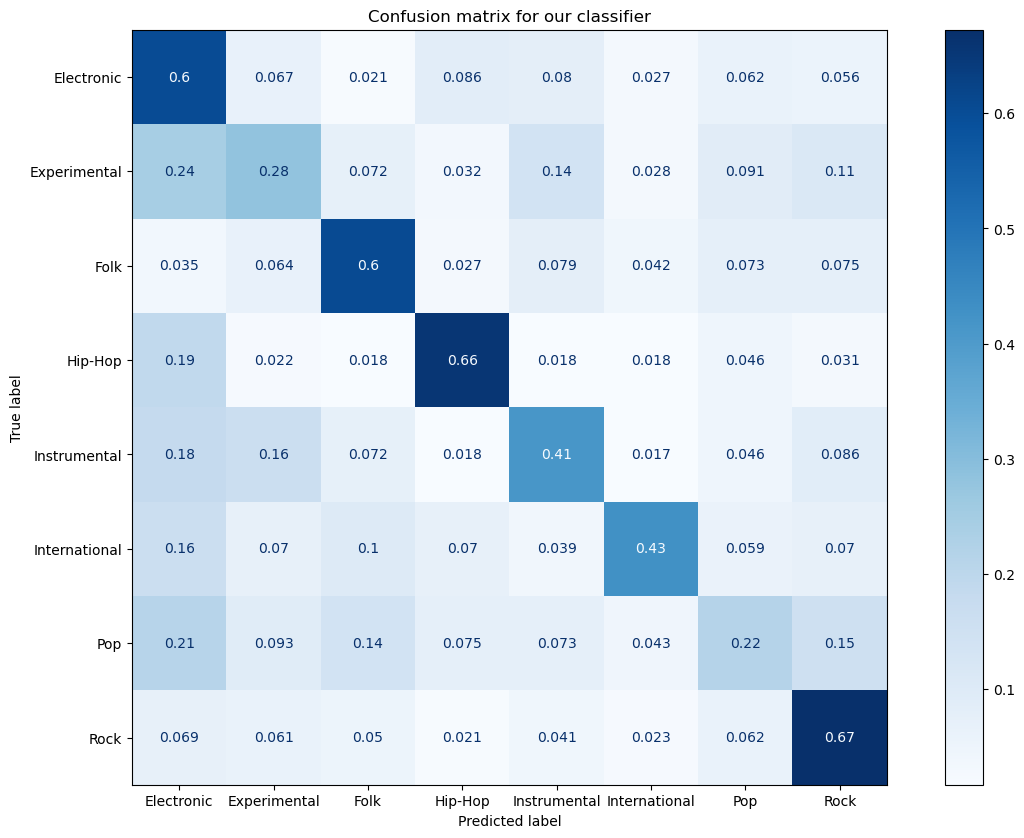

               precision    recall  f1-score   support

   Electronic       0.57      0.60      0.58      2104
 Experimental       0.26      0.28      0.27       739
         Folk       0.56      0.60      0.58       915
      Hip-Hop       0.66      0.66      0.66      1136
 Instrumental       0.36      0.41      0.38       718
International       0.45      0.43      0.44       457
          Pop       0.24      0.22      0.23       765
         Rock       0.75      0.67      0.71      2337

     accuracy                           0.55      9171
    macro avg       0.48      0.48      0.48      9171
 weighted avg       0.55      0.55      0.55      9171

Accuracy:  0.5453058554138044


In [7]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 100

# Predict the test set
predictions = clf.predict(X_test)
# Generate confusion matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)

print(classification_report(y_test, predictions))

print("Accuracy: ", accuracy_score(y_test, predictions))

In [ ]:
564548